In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [16]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/CSV files/axis_hour_data.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,date,open,high,low,close,volume,date_day
0,0,2015-02-02 09:15:00+05:30,585.95,595.40,584.60,593.60,608818,2015-02-02
1,1,2015-02-02 10:15:00+05:30,593.40,595.00,590.45,593.15,393192,2015-02-02
2,2,2015-02-02 11:15:00+05:30,593.15,593.40,588.55,591.00,414359,2015-02-02
3,3,2015-02-02 12:15:00+05:30,591.00,592.20,589.10,591.90,257469,2015-02-02
4,4,2015-02-02 13:15:00+05:30,591.85,617.75,591.55,616.30,2575263,2015-02-02


In [17]:
from datetime import datetime
mean_data=df.iloc[:,2:4].mean(axis=1)
df['mean_data']=mean_data
dataset=df[['mean_data']]
dataset=dataset.iloc[:-4]
dataset.head()

,mean_data
0,590.675
1,594.200
2,593.275
3,591.600
4,604.800


In [18]:
train=dataset.iloc[:-14]
#test set= 5 records
test=dataset.iloc[-14:]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)



506
Epoch 1/100
506/506 [==============================] - 4s 5ms/step - loss: 0.0095
Epoch 2/100
506/506 [==============================] - 2s 4ms/step - loss: 9.1845e-05
Epoch 3/100
506/506 [==============================] - 2s 4ms/step - loss: 7.7676e-05
Epoch 4/100
506/506 [==============================] - 2s 4ms/step - loss: 8.6784e-05
Epoch 5/100
506/506 [==============================] - 2s 4ms/step - loss: 7.6943e-05
Epoch 6/100
506/506 [==============================] - 3s 6ms/step - loss: 1.1482e-04
Epoch 7/100
506/506 [==============================] - 2s 4ms/step - loss: 8.9169e-05
Epoch 8/100
506/506 [==============================] - 2s 4ms/step - loss: 1.3881e-04
Epoch 9/100
506/506 [==============================] - 2s 4ms/step - loss: 9.0537e-05
Epoch 10/100
506/506 [==============================] - 2s 4ms/step - loss: 9.5764e-05
Epoch 11/100
506/506 [==============================] - 3s 6ms/step - loss: 1.1011e-04
Epoch 12/100
506/506 [==============================

In [19]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)

print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 240ms/step
--------------------
predictions [[1225.3916]
 [1240.3713]
 [1224.3843]
 [1233.4874]
 [1227.2533]
 [1233.9723]
 [1236.7397]]
Actual values [[1236.575]
 [1227.525]
 [1232.45 ]
 [1229.125]
 [1233.275]
 [1236.475]
 [1236.6  ]]
--------------------


In [20]:
print('new data frame ')
forecast_values=true_predictions.tolist()
y_test_values=ylist.tolist()
print(forecast_values)
print(y_test_values)
df=pd.DataFrame({'Iteration':1,'Actual_values': y_test_values, 'Predictions': forecast_values})
df['Iteration'] = ['1'] + [''] * (len(df) - 1)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0])
df['Predictions'] = df['Predictions'].apply(lambda x: x[0])
df.head()

new data frame 
[[1225.3916015625], [1240.371337890625], [1224.38427734375], [1233.4874267578125], [1227.2532958984375], [1233.9722900390625], [1236.73974609375]]
[[1236.5749999999998], [1227.525], [1232.4499999999998], [1229.125], [1233.275], [1236.475], [1236.6]]


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296


instace 1


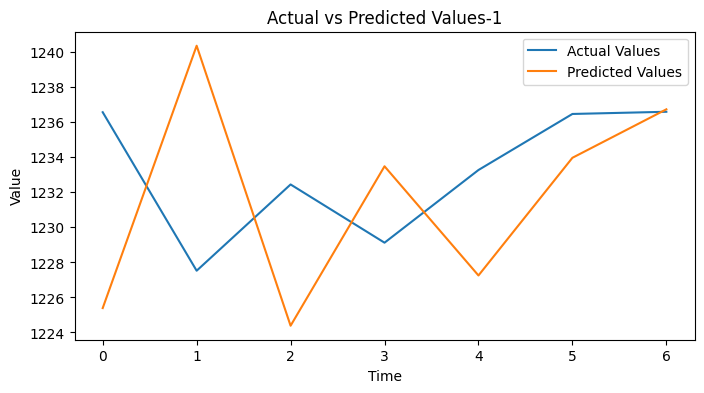

In [21]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 1')
plt.title('Actual vs Predicted Values-1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**2**

In [22]:
train=dataset.iloc[:-28]
#test set= 5 records
test=dataset.iloc[-28:-14]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


506
Epoch 1/100
506/506 [==============================] - 5s 5ms/step - loss: 0.0198
Epoch 2/100
506/506 [==============================] - 2s 4ms/step - loss: 1.0973e-04
Epoch 3/100
506/506 [==============================] - 2s 4ms/step - loss: 8.7651e-05
Epoch 4/100
506/506 [==============================] - 2s 4ms/step - loss: 8.4619e-05
Epoch 5/100
506/506 [==============================] - 2s 4ms/step - loss: 9.4304e-05
Epoch 6/100
506/506 [==============================] - 3s 7ms/step - loss: 8.6452e-05
Epoch 7/100
506/506 [==============================] - 2s 4ms/step - loss: 1.0813e-04
Epoch 8/100
506/506 [==============================] - 2s 4ms/step - loss: 1.0843e-04
Epoch 9/100
506/506 [==============================] - 2s 4ms/step - loss: 1.1211e-04
Epoch 10/100
506/506 [==============================] - 2s 4ms/step - loss: 1.0798e-04
Epoch 11/100
506/506 [==============================] - 3s 6ms/step - loss: 1.5959e-04
Epoch 12/100
506/506 [==============================

In [23]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 184ms/step
--------------------
predictions [[1180.5215]
 [1180.9116]
 [1182.0898]
 [1195.3634]
 [1186.507 ]
 [1187.8042]
 [1185.7684]]
Actual values [[1181.075]
 [1182.175]
 [1194.   ]
 [1188.175]
 [1187.7  ]
 [1185.95 ]
 [1187.525]]
--------------------


In [24]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
5,,1236.475,1233.972290
6,,1236.600,1236.739746
7,NaN,1181.075,1180.521484
8,NaN,1182.175,1180.911621
9,NaN,1194.000,1182.089844


instace 2


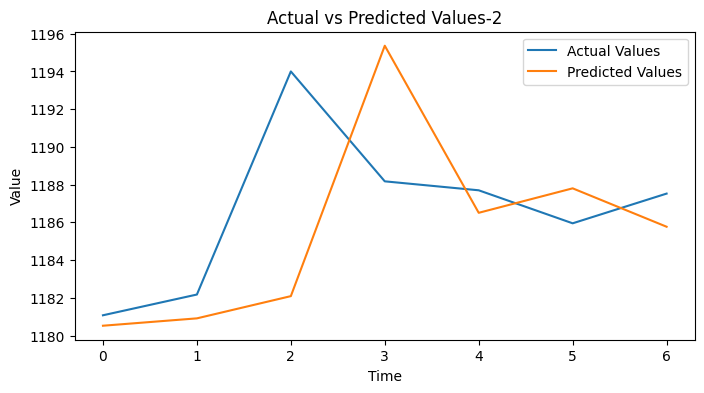

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 2')
plt.title('Actual vs Predicted Values-2')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**3**

In [26]:
train=dataset.iloc[:-42]
#test set= 5 records
test=dataset.iloc[-42:-28]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


505
Epoch 1/100
505/505 [==============================] - 3s 4ms/step - loss: 0.0151
Epoch 2/100
505/505 [==============================] - 2s 4ms/step - loss: 8.1159e-05
Epoch 3/100
505/505 [==============================] - 3s 6ms/step - loss: 8.6433e-05
Epoch 4/100
505/505 [==============================] - 2s 4ms/step - loss: 1.0143e-04
Epoch 5/100
505/505 [==============================] - 2s 4ms/step - loss: 8.4625e-05
Epoch 6/100
505/505 [==============================] - 2s 4ms/step - loss: 1.7072e-04
Epoch 7/100
505/505 [==============================] - 2s 4ms/step - loss: 7.8418e-05
Epoch 8/100
505/505 [==============================] - 3s 6ms/step - loss: 9.4923e-05
Epoch 9/100
505/505 [==============================] - 2s 4ms/step - loss: 7.5972e-05
Epoch 10/100
505/505 [==============================] - 2s 4ms/step - loss: 1.0010e-04
Epoch 11/100
505/505 [==============================] - 2s 4ms/step - loss: 1.0406e-04
Epoch 12/100
505/505 [==============================

In [28]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 289ms/step
--------------------
predictions [[1203.147 ]
 [1199.4226]
 [1192.9376]
 [1209.0464]
 [1191.384 ]
 [1191.2444]
 [1189.9199]]
Actual values [[1195.725]
 [1190.075]
 [1201.9  ]
 [1189.65 ]
 [1187.675]
 [1186.275]
 [1186.95 ]]
--------------------


In [29]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
5,,1236.475,1233.972290
6,,1236.600,1236.739746
7,NaN,1181.075,1180.521484
8,NaN,1182.175,1180.911621
9,NaN,1194.000,1182.089844


instace 3


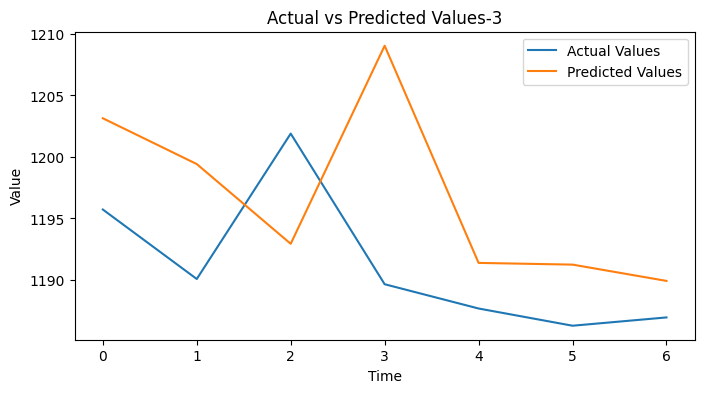

In [30]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 3')
plt.title('Actual vs Predicted Values-3')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**4**

In [31]:
train=dataset.iloc[:-56]
#test set= 5 records
test=dataset.iloc[-56:-42]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


505
Epoch 1/100
505/505 [==============================] - 7s 9ms/step - loss: 0.0098
Epoch 2/100
505/505 [==============================] - 4s 7ms/step - loss: 8.1258e-05
Epoch 3/100
505/505 [==============================] - 3s 7ms/step - loss: 7.4166e-05
Epoch 4/100
505/505 [==============================] - 2s 4ms/step - loss: 7.9818e-05
Epoch 5/100
505/505 [==============================] - 3s 6ms/step - loss: 7.2785e-05
Epoch 6/100
505/505 [==============================] - 2s 4ms/step - loss: 8.2153e-05
Epoch 7/100
505/505 [==============================] - 2s 4ms/step - loss: 9.3268e-05
Epoch 8/100
505/505 [==============================] - 2s 4ms/step - loss: 7.7668e-05
Epoch 9/100
505/505 [==============================] - 2s 4ms/step - loss: 8.5935e-05
Epoch 10/100
505/505 [==============================] - 3s 6ms/step - loss: 1.2193e-04
Epoch 11/100
505/505 [==============================] - 2s 4ms/step - loss: 8.3765e-05
Epoch 12/100
505/505 [==============================

In [32]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 182ms/step
--------------------
predictions [[1212.4619]
 [1213.0455]
 [1200.711 ]
 [1209.5177]
 [1210.1189]
 [1207.5679]
 [1205.1398]]
Actual values [[1210.075]
 [1200.975]
 [1205.7  ]
 [1207.225]
 [1205.55 ]
 [1203.375]
 [1206.2  ]]
--------------------


In [33]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
5,,1236.475,1233.972290
6,,1236.600,1236.739746
7,NaN,1181.075,1180.521484
8,NaN,1182.175,1180.911621
9,NaN,1194.000,1182.089844


instace 4


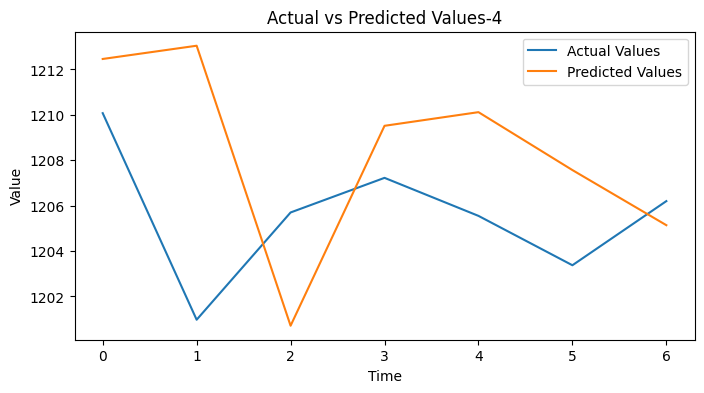

In [34]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 4')
plt.title('Actual vs Predicted Values-4')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**5**

In [35]:
train=dataset.iloc[:-70]
#test set= 5 records
test=dataset.iloc[-70:-56]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


504
Epoch 1/100
504/504 [==============================] - 3s 4ms/step - loss: 0.0050
Epoch 2/100
504/504 [==============================] - 3s 7ms/step - loss: 7.4239e-05
Epoch 3/100
504/504 [==============================] - 2s 5ms/step - loss: 7.2045e-05
Epoch 4/100
504/504 [==============================] - 2s 4ms/step - loss: 7.3601e-05
Epoch 5/100
504/504 [==============================] - 2s 4ms/step - loss: 7.8717e-05
Epoch 6/100
504/504 [==============================] - 2s 4ms/step - loss: 7.1793e-05
Epoch 7/100
504/504 [==============================] - 2s 5ms/step - loss: 7.4800e-05
Epoch 8/100
504/504 [==============================] - 3s 7ms/step - loss: 6.6455e-05
Epoch 9/100
504/504 [==============================] - 2s 4ms/step - loss: 9.3207e-05
Epoch 10/100
504/504 [==============================] - 2s 4ms/step - loss: 9.5386e-05
Epoch 11/100
504/504 [==============================] - 2s 4ms/step - loss: 9.3860e-05
Epoch 12/100
504/504 [==============================

In [36]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 168ms/step
--------------------
predictions [[1168.57  ]
 [1169.4532]
 [1172.2767]
 [1179.1965]
 [1176.2808]
 [1187.5891]
 [1192.516 ]]
Actual values [[1170.9  ]
 [1173.25 ]
 [1179.3  ]
 [1178.625]
 [1186.95 ]
 [1192.8  ]
 [1193.75 ]]
--------------------


In [37]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
5,,1236.475,1233.972290
6,,1236.600,1236.739746
7,NaN,1181.075,1180.521484
8,NaN,1182.175,1180.911621
9,NaN,1194.000,1182.089844


instace 5


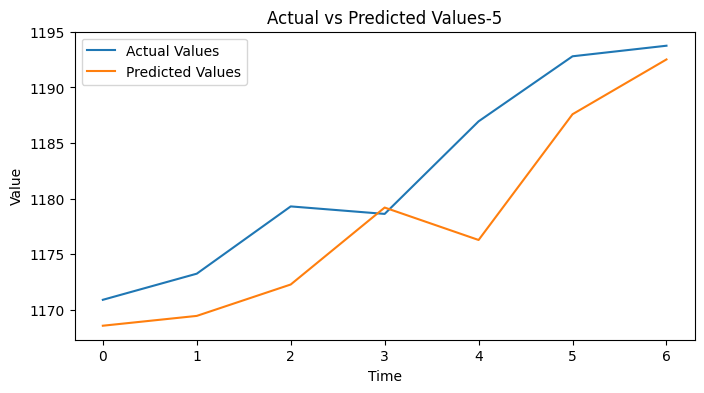

In [38]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 5')
plt.title('Actual vs Predicted Values-5')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**6**

In [39]:
train=dataset.iloc[:-84]
#test set= 5 records
test=dataset.iloc[-84:-70]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


504
Epoch 1/100
504/504 [==============================] - 3s 4ms/step - loss: 0.0102
Epoch 2/100
504/504 [==============================] - 2s 4ms/step - loss: 6.8445e-05
Epoch 3/100
504/504 [==============================] - 3s 6ms/step - loss: 7.5410e-05
Epoch 4/100
504/504 [==============================] - 2s 4ms/step - loss: 9.0264e-05
Epoch 5/100
504/504 [==============================] - 2s 4ms/step - loss: 8.4865e-05
Epoch 6/100
504/504 [==============================] - 2s 4ms/step - loss: 8.7982e-05
Epoch 7/100
504/504 [==============================] - 2s 4ms/step - loss: 1.6988e-04
Epoch 8/100
504/504 [==============================] - 3s 6ms/step - loss: 7.3925e-05
Epoch 9/100
504/504 [==============================] - 3s 6ms/step - loss: 8.7681e-05
Epoch 10/100
504/504 [==============================] - 2s 4ms/step - loss: 7.8817e-05
Epoch 11/100
504/504 [==============================] - 2s 4ms/step - loss: 8.5999e-05
Epoch 12/100
504/504 [==============================

In [40]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 184ms/step
--------------------
predictions [[1163.8549]
 [1155.5708]
 [1144.0404]
 [1147.1162]
 [1139.8762]
 [1156.9604]
 [1152.4214]]
Actual values [[1152.475]
 [1141.65 ]
 [1141.5  ]
 [1136.4  ]
 [1148.7  ]
 [1148.8  ]
 [1165.1  ]]
--------------------


In [41]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
5,,1236.475,1233.972290
6,,1236.600,1236.739746
7,NaN,1181.075,1180.521484
8,NaN,1182.175,1180.911621
9,NaN,1194.000,1182.089844


instace 6


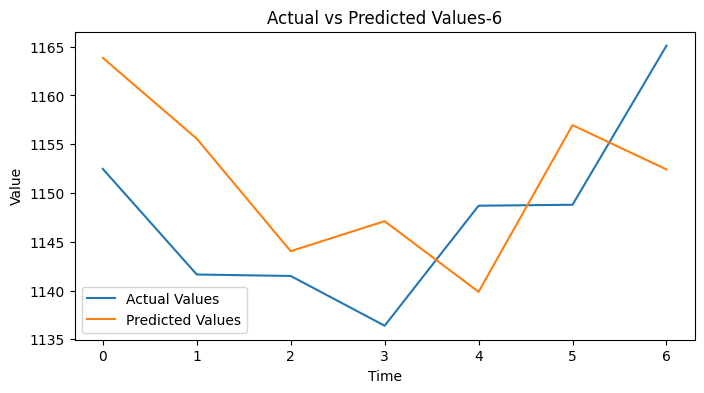

In [42]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 6')
plt.title('Actual vs Predicted Values-6')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**7**

In [43]:
train=dataset.iloc[:-98]
#test set= 5 records
test=dataset.iloc[-98:-84]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


503
Epoch 1/100
503/503 [==============================] - 4s 4ms/step - loss: 0.0057
Epoch 2/100
503/503 [==============================] - 2s 4ms/step - loss: 9.4124e-05
Epoch 3/100
503/503 [==============================] - 3s 7ms/step - loss: 8.1231e-05
Epoch 4/100
503/503 [==============================] - 2s 5ms/step - loss: 1.2807e-04
Epoch 5/100
503/503 [==============================] - 2s 4ms/step - loss: 1.0961e-04
Epoch 6/100
503/503 [==============================] - 2s 4ms/step - loss: 8.8462e-05
Epoch 7/100
503/503 [==============================] - 2s 4ms/step - loss: 1.0392e-04
Epoch 8/100
503/503 [==============================] - 2s 5ms/step - loss: 1.5626e-04
Epoch 9/100
503/503 [==============================] - 4s 7ms/step - loss: 9.7462e-05
Epoch 10/100
503/503 [==============================] - 2s 4ms/step - loss: 9.4404e-05
Epoch 11/100
503/503 [==============================] - 2s 4ms/step - loss: 1.2842e-04
Epoch 12/100
503/503 [==============================

In [45]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 307ms/step
--------------------
predictions [[1164.6393]
 [1164.159 ]
 [1162.6426]
 [1220.9469]
 [1215.8774]
 [1235.0548]
 [1234.8773]]
Actual values [[1164.575]
 [1163.225]
 [1213.525]
 [1215.975]
 [1231.1  ]
 [1234.4  ]
 [1223.875]]
--------------------


In [46]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
5,,1236.475,1233.972290
6,,1236.600,1236.739746
7,NaN,1181.075,1180.521484
8,NaN,1182.175,1180.911621
9,NaN,1194.000,1182.089844


instace 7


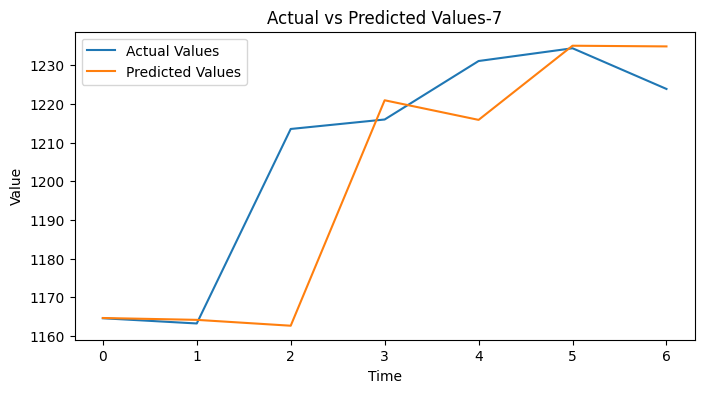

In [47]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 7')
plt.title('Actual vs Predicted Values-7')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**8**

In [48]:
train=dataset.iloc[:-112]
#test set= 5 records
test=dataset.iloc[-112:-98]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


503
Epoch 1/100
503/503 [==============================] - 8s 8ms/step - loss: 0.0115
Epoch 2/100
503/503 [==============================] - 4s 8ms/step - loss: 8.1892e-05
Epoch 3/100
503/503 [==============================] - 3s 6ms/step - loss: 8.4968e-05
Epoch 4/100
503/503 [==============================] - 3s 7ms/step - loss: 8.9530e-05
Epoch 5/100
503/503 [==============================] - 2s 4ms/step - loss: 8.3721e-05
Epoch 6/100
503/503 [==============================] - 2s 4ms/step - loss: 7.8311e-05
Epoch 7/100
503/503 [==============================] - 2s 4ms/step - loss: 9.4898e-05
Epoch 8/100
503/503 [==============================] - 3s 5ms/step - loss: 1.0985e-04
Epoch 9/100
503/503 [==============================] - 4s 7ms/step - loss: 8.4372e-05
Epoch 10/100
503/503 [==============================] - 2s 4ms/step - loss: 1.2029e-04
Epoch 11/100
503/503 [==============================] - 2s 4ms/step - loss: 9.5342e-05
Epoch 12/100
503/503 [==============================

In [49]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 168ms/step
--------------------
predictions [[1165.4703]
 [1159.6199]
 [1157.3945]
 [1164.7412]
 [1166.0966]
 [1159.8308]
 [1158.6923]]
Actual values [[1164.35 ]
 [1161.85 ]
 [1167.5  ]
 [1169.275]
 [1164.35 ]
 [1162.825]
 [1169.25 ]]
--------------------


In [50]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
5,,1236.475,1233.972290
6,,1236.600,1236.739746
7,NaN,1181.075,1180.521484
8,NaN,1182.175,1180.911621
9,NaN,1194.000,1182.089844


instace 8


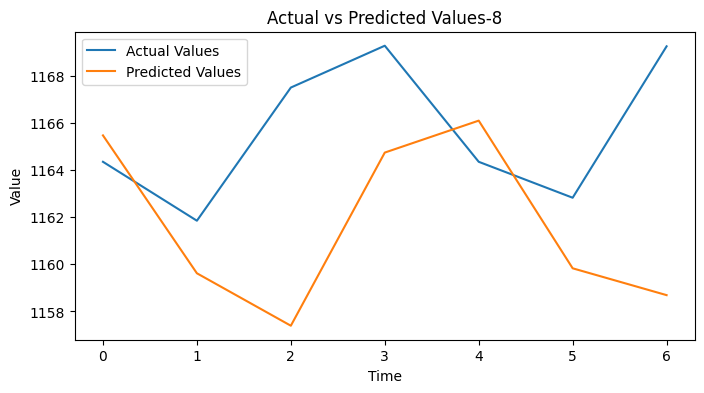

In [51]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 8')
plt.title('Actual vs Predicted Values-8')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**9**

In [52]:
train=dataset.iloc[:-126]
#test set= 5 records
test=dataset.iloc[-126:-112]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


503
Epoch 1/100
503/503 [==============================] - 4s 4ms/step - loss: 0.0262
Epoch 2/100
503/503 [==============================] - 3s 6ms/step - loss: 8.8394e-05
Epoch 3/100
503/503 [==============================] - 3s 6ms/step - loss: 8.8477e-05
Epoch 4/100
503/503 [==============================] - 2s 4ms/step - loss: 8.2453e-05
Epoch 5/100
503/503 [==============================] - 2s 4ms/step - loss: 8.6255e-05
Epoch 6/100
503/503 [==============================] - 2s 4ms/step - loss: 9.6980e-05
Epoch 7/100
503/503 [==============================] - 3s 5ms/step - loss: 1.2415e-04
Epoch 8/100
503/503 [==============================] - 2s 4ms/step - loss: 8.1821e-05
Epoch 9/100
503/503 [==============================] - 2s 4ms/step - loss: 9.2018e-05
Epoch 10/100
503/503 [==============================] - 2s 4ms/step - loss: 1.5390e-04
Epoch 11/100
503/503 [==============================] - 2s 4ms/step - loss: 8.9118e-05
Epoch 12/100
503/503 [==============================

In [53]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 169ms/step
--------------------
predictions [[1191.7128]
 [1193.1825]
 [1185.0797]
 [1188.446 ]
 [1184.7318]
 [1181.687 ]
 [1181.6592]]
Actual values [[1194.675]
 [1188.3  ]
 [1190.2  ]
 [1187.425]
 [1184.4  ]
 [1183.875]
 [1188.5  ]]
--------------------


In [54]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
...,...,...,...
58,NaN,1190.200,1185.079712
59,NaN,1187.425,1188.446045
60,NaN,1184.400,1184.731812
61,NaN,1183.875,1181.687012


instace 9


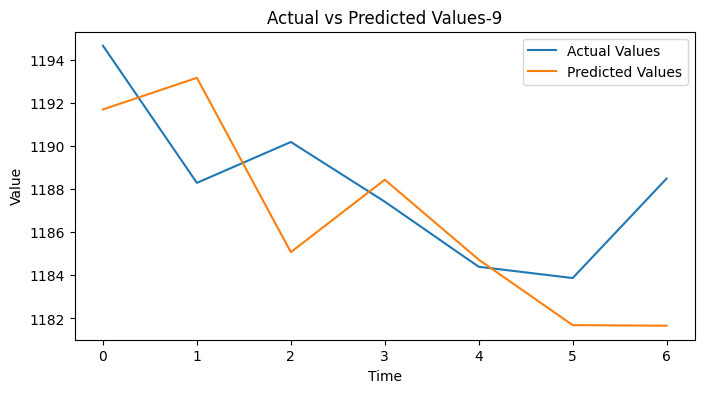

In [55]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 9')
plt.title('Actual vs Predicted Values-9')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**10**

In [56]:
train=dataset.iloc[:-140]
#test set= 5 records
test=dataset.iloc[-140:-126]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


502
Epoch 1/100
502/502 [==============================] - 3s 4ms/step - loss: 0.0112
Epoch 2/100
502/502 [==============================] - 2s 4ms/step - loss: 7.4609e-05
Epoch 3/100
502/502 [==============================] - 3s 7ms/step - loss: 6.8068e-05
Epoch 4/100
502/502 [==============================] - 2s 4ms/step - loss: 7.1325e-05
Epoch 5/100
502/502 [==============================] - 2s 4ms/step - loss: 7.6503e-05
Epoch 6/100
502/502 [==============================] - 2s 4ms/step - loss: 9.2867e-05
Epoch 7/100
502/502 [==============================] - 2s 4ms/step - loss: 7.9059e-05
Epoch 8/100
502/502 [==============================] - 2s 4ms/step - loss: 7.8326e-05
Epoch 9/100
502/502 [==============================] - 3s 7ms/step - loss: 1.0261e-04
Epoch 10/100
502/502 [==============================] - 2s 4ms/step - loss: 9.9516e-05
Epoch 11/100
502/502 [==============================] - 2s 4ms/step - loss: 9.0675e-05
Epoch 12/100
502/502 [==============================

In [57]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 192ms/step
--------------------
predictions [[1147.3743]
 [1147.0907]
 [1148.6296]
 [1152.0305]
 [1145.444 ]
 [1146.9515]
 [1153.431 ]]
Actual values [[1165.275]
 [1166.8  ]
 [1170.075]
 [1164.425]
 [1165.325]
 [1171.25 ]
 [1174.5  ]]
--------------------


In [58]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
...,...,...,...
65,NaN,1170.075,1148.629639
66,NaN,1164.425,1152.030518
67,NaN,1165.325,1145.443970
68,NaN,1171.250,1146.951538


instace 10


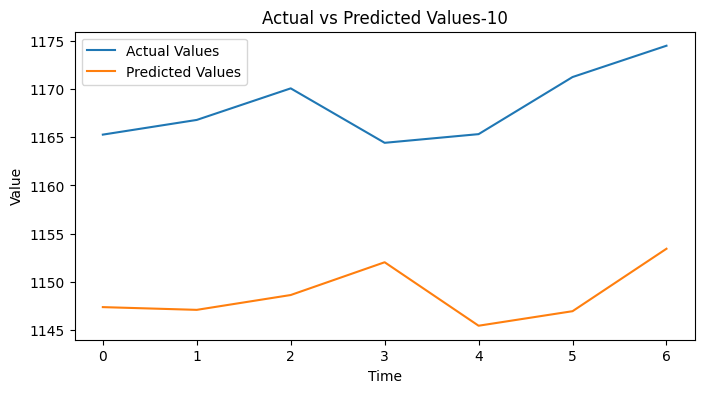

In [59]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 10')
plt.title('Actual vs Predicted Values-10')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**11**

In [60]:
train=dataset.iloc[:-154]
#test set= 5 records
test=dataset.iloc[-154:-140]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


502
Epoch 1/100
502/502 [==============================] - 4s 5ms/step - loss: 0.0151
Epoch 2/100
502/502 [==============================] - 3s 7ms/step - loss: 8.8710e-05
Epoch 3/100
502/502 [==============================] - 2s 4ms/step - loss: 8.6710e-05
Epoch 4/100
502/502 [==============================] - 2s 4ms/step - loss: 8.5736e-05
Epoch 5/100
502/502 [==============================] - 2s 4ms/step - loss: 8.9832e-05
Epoch 6/100
502/502 [==============================] - 2s 4ms/step - loss: 8.7816e-05
Epoch 7/100
502/502 [==============================] - 3s 7ms/step - loss: 1.0826e-04
Epoch 8/100
502/502 [==============================] - 2s 4ms/step - loss: 1.1844e-04
Epoch 9/100
502/502 [==============================] - 2s 4ms/step - loss: 9.9690e-05
Epoch 10/100
502/502 [==============================] - 2s 4ms/step - loss: 1.0515e-04
Epoch 11/100
502/502 [==============================] - 2s 5ms/step - loss: 1.1358e-04
Epoch 12/100
502/502 [==============================

In [61]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 170ms/step
--------------------
predictions [[1140.084 ]
 [1138.2283]
 [1135.3329]
 [1141.6622]
 [1125.3829]
 [1124.5405]
 [1126.5095]]
Actual values [[1140.45 ]
 [1137.85 ]
 [1142.   ]
 [1130.825]
 [1127.175]
 [1128.   ]
 [1127.525]]
--------------------


In [62]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
...,...,...,...
72,NaN,1142.000,1135.332886
73,NaN,1130.825,1141.662231
74,NaN,1127.175,1125.382935
75,NaN,1128.000,1124.540527


instace 11


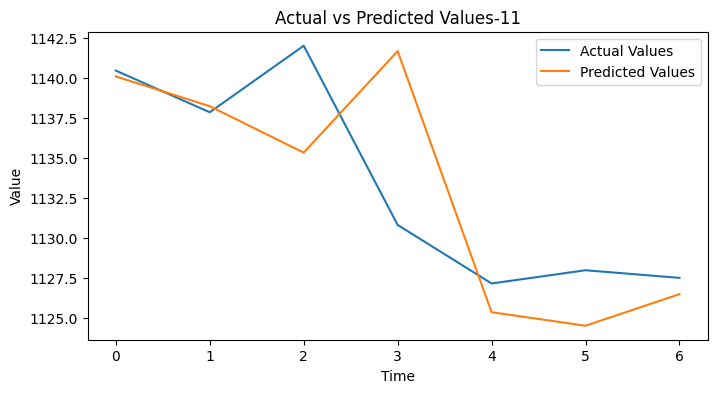

In [63]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 11')
plt.title('Actual vs Predicted Values-11')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

12

In [64]:
train=dataset.iloc[:-168]
#test set= 5 records
test=dataset.iloc[-168:-154]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


501
Epoch 1/100
501/501 [==============================] - 3s 4ms/step - loss: 0.0167
Epoch 2/100
501/501 [==============================] - 3s 7ms/step - loss: 8.2232e-05
Epoch 3/100
501/501 [==============================] - 2s 4ms/step - loss: 8.5442e-05
Epoch 4/100
501/501 [==============================] - 2s 4ms/step - loss: 8.9569e-05
Epoch 5/100
501/501 [==============================] - 3s 5ms/step - loss: 8.9263e-05
Epoch 6/100
501/501 [==============================] - 3s 5ms/step - loss: 9.1699e-05
Epoch 7/100
501/501 [==============================] - 2s 5ms/step - loss: 1.0161e-04
Epoch 8/100
501/501 [==============================] - 2s 4ms/step - loss: 1.1235e-04
Epoch 9/100
501/501 [==============================] - 2s 4ms/step - loss: 1.4028e-04
Epoch 10/100
501/501 [==============================] - 2s 4ms/step - loss: 1.2446e-04
Epoch 11/100
501/501 [==============================] - 3s 7ms/step - loss: 9.6832e-05
Epoch 12/100
501/501 [==============================

In [65]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 185ms/step
--------------------
predictions [[1150.3417]
 [1151.5914]
 [1159.5325]
 [1158.0032]
 [1160.4227]
 [1158.6353]
 [1160.1772]]
Actual values [[1135.825]
 [1141.825]
 [1142.325]
 [1144.1  ]
 [1143.125]
 [1143.875]
 [1143.475]]
--------------------


In [66]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
...,...,...,...
79,NaN,1142.325,1159.532471
80,NaN,1144.100,1158.003174
81,NaN,1143.125,1160.422729
82,NaN,1143.875,1158.635254


instace 12


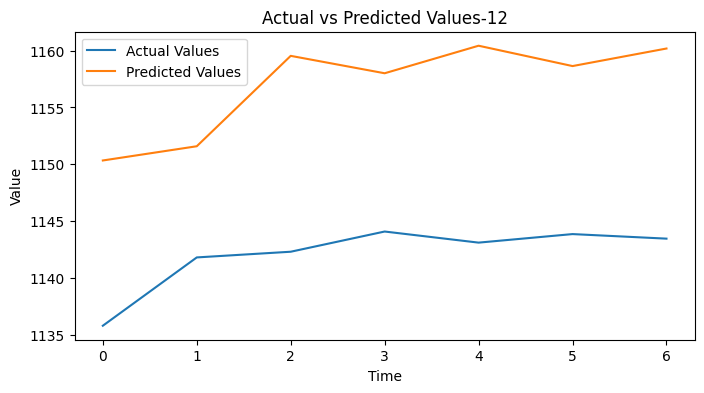

In [67]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 12')
plt.title('Actual vs Predicted Values-12')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**13**

In [68]:
train=dataset.iloc[:-182]
#test set= 5 records
test=dataset.iloc[-182:-168]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


501
Epoch 1/100
501/501 [==============================] - 4s 4ms/step - loss: 0.0093
Epoch 2/100
501/501 [==============================] - 2s 4ms/step - loss: 9.1159e-05
Epoch 3/100
501/501 [==============================] - 2s 4ms/step - loss: 9.2075e-05
Epoch 4/100
501/501 [==============================] - 4s 7ms/step - loss: 8.3705e-05
Epoch 5/100
501/501 [==============================] - 2s 4ms/step - loss: 1.1494e-04
Epoch 6/100
501/501 [==============================] - 2s 4ms/step - loss: 9.6434e-05
Epoch 7/100
501/501 [==============================] - 2s 5ms/step - loss: 1.2198e-04
Epoch 8/100
501/501 [==============================] - 3s 5ms/step - loss: 1.0821e-04
Epoch 9/100
501/501 [==============================] - 4s 7ms/step - loss: 9.9027e-05
Epoch 10/100
501/501 [==============================] - 2s 4ms/step - loss: 1.5288e-04
Epoch 11/100
501/501 [==============================] - 2s 4ms/step - loss: 8.4317e-05
Epoch 12/100
501/501 [==============================

In [69]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 173ms/step
--------------------
predictions [[1126.0532]
 [1118.7362]
 [1120.6936]
 [1122.1321]
 [1120.4968]
 [1125.4152]
 [1125.6656]]
Actual values [[1123.575]
 [1124.   ]
 [1125.4  ]
 [1124.325]
 [1128.075]
 [1129.1  ]
 [1134.325]]
--------------------


In [70]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
...,...,...,...
86,NaN,1125.400,1120.693604
87,NaN,1124.325,1122.132080
88,NaN,1128.075,1120.496826
89,NaN,1129.100,1125.415161


instace 13


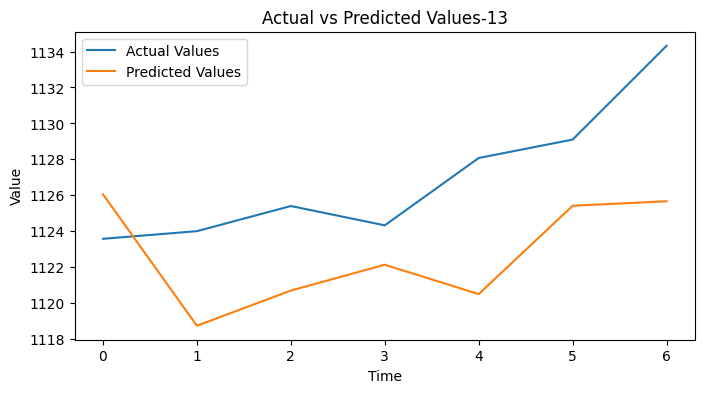

In [71]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 13')
plt.title('Actual vs Predicted Values-13')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**14**

In [72]:
train=dataset.iloc[:-196]
#test set= 5 records
test=dataset.iloc[-196:-182]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


500
Epoch 1/100
500/500 [==============================] - 6s 7ms/step - loss: 0.0138
Epoch 2/100
500/500 [==============================] - 2s 4ms/step - loss: 9.3061e-05
Epoch 3/100
500/500 [==============================] - 2s 4ms/step - loss: 8.3015e-05
Epoch 4/100
500/500 [==============================] - 2s 5ms/step - loss: 1.1022e-04
Epoch 5/100
500/500 [==============================] - 2s 4ms/step - loss: 1.0514e-04
Epoch 6/100
500/500 [==============================] - 4s 7ms/step - loss: 8.9700e-05
Epoch 7/100
500/500 [==============================] - 2s 5ms/step - loss: 8.8851e-05
Epoch 8/100
500/500 [==============================] - 2s 4ms/step - loss: 1.0848e-04
Epoch 9/100
500/500 [==============================] - 2s 5ms/step - loss: 1.3986e-04
Epoch 10/100
500/500 [==============================] - 2s 4ms/step - loss: 8.4554e-05
Epoch 11/100
500/500 [==============================] - 3s 6ms/step - loss: 9.1619e-05
Epoch 12/100
500/500 [==============================

In [73]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 210ms/step
--------------------
predictions [[1140.5997]
 [1134.0492]
 [1125.8114]
 [1133.26  ]
 [1145.846 ]
 [1151.8938]
 [1152.441 ]]
Actual values [[1117.775]
 [1110.2  ]
 [1113.625]
 [1124.45 ]
 [1132.   ]
 [1134.   ]
 [1133.4  ]]
--------------------


In [74]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
...,...,...,...
93,NaN,1113.625,1125.811401
94,NaN,1124.450,1133.260010
95,NaN,1132.000,1145.845947
96,NaN,1134.000,1151.893799


instace 14


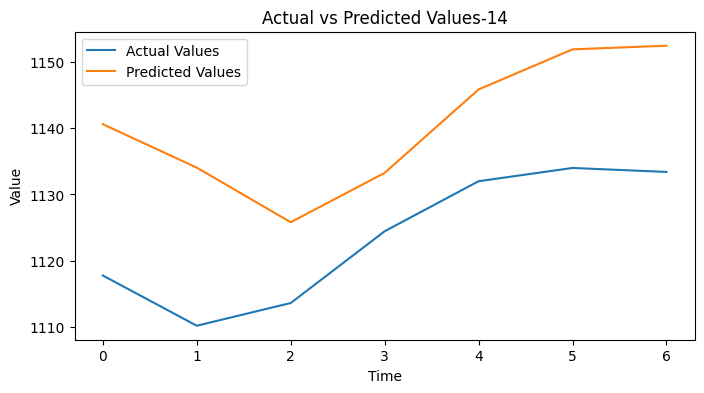

In [75]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 14')
plt.title('Actual vs Predicted Values-14')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**15**

In [76]:
train=dataset.iloc[:-210]
#test set= 5 records
test=dataset.iloc[-210:-196]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


500
Epoch 1/100
500/500 [==============================] - 4s 5ms/step - loss: 0.0191
Epoch 2/100
500/500 [==============================] - 2s 4ms/step - loss: 7.8606e-05
Epoch 3/100
500/500 [==============================] - 2s 5ms/step - loss: 8.0712e-05
Epoch 4/100
500/500 [==============================] - 2s 4ms/step - loss: 7.7570e-05
Epoch 5/100
500/500 [==============================] - 3s 6ms/step - loss: 9.0207e-05
Epoch 6/100
500/500 [==============================] - 4s 8ms/step - loss: 1.0291e-04
Epoch 7/100
500/500 [==============================] - 3s 5ms/step - loss: 1.0082e-04
Epoch 8/100
500/500 [==============================] - 3s 6ms/step - loss: 1.2043e-04
Epoch 9/100
500/500 [==============================] - 3s 7ms/step - loss: 1.0081e-04
Epoch 10/100
500/500 [==============================] - 4s 8ms/step - loss: 9.4302e-05
Epoch 11/100
500/500 [==============================] - 2s 4ms/step - loss: 1.0067e-04
Epoch 12/100
500/500 [==============================

In [77]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 178ms/step
--------------------
predictions [[1130.7935]
 [1130.9531]
 [1127.9163]
 [1133.0266]
 [1129.8383]
 [1126.9955]
 [1118.3553]]
Actual values [[1127.875]
 [1125.475]
 [1128.85 ]
 [1127.275]
 [1124.625]
 [1117.325]
 [1131.85 ]]
--------------------


In [78]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
...,...,...,...
100,NaN,1128.850,1127.916260
101,NaN,1127.275,1133.026611
102,NaN,1124.625,1129.838257
103,NaN,1117.325,1126.995483


instace 15


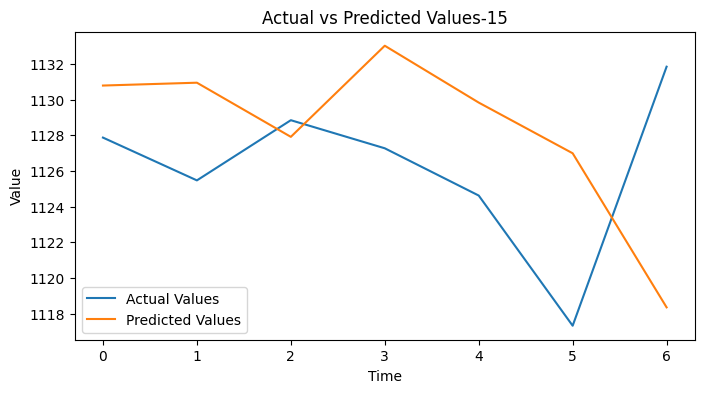

In [79]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 15')
plt.title('Actual vs Predicted Values-15')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**16**

In [80]:
train=dataset.iloc[:-224]
#test set= 5 records
test=dataset.iloc[-224:-210]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


500
Epoch 1/100
500/500 [==============================] - 4s 5ms/step - loss: 0.0096
Epoch 2/100
500/500 [==============================] - 2s 5ms/step - loss: 1.4759e-04
Epoch 3/100
500/500 [==============================] - 3s 5ms/step - loss: 8.8079e-05
Epoch 4/100
500/500 [==============================] - 3s 5ms/step - loss: 9.1511e-05
Epoch 5/100
500/500 [==============================] - 2s 4ms/step - loss: 9.3906e-05
Epoch 6/100
500/500 [==============================] - 4s 7ms/step - loss: 1.3897e-04
Epoch 7/100
500/500 [==============================] - 2s 5ms/step - loss: 8.7930e-05
Epoch 8/100
500/500 [==============================] - 2s 4ms/step - loss: 9.9129e-05
Epoch 9/100
500/500 [==============================] - 2s 5ms/step - loss: 9.6897e-05
Epoch 10/100
500/500 [==============================] - 2s 5ms/step - loss: 9.9685e-05
Epoch 11/100
500/500 [==============================] - 4s 8ms/step - loss: 1.4666e-04
Epoch 12/100
500/500 [==============================

In [81]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 195ms/step
--------------------
predictions [[1150.6566]
 [1133.4241]
 [1133.6779]
 [1131.4014]
 [1136.9415]
 [1137.0873]
 [1130.6321]]
Actual values [[1134.25 ]
 [1132.4  ]
 [1130.175]
 [1133.95 ]
 [1134.425]
 [1129.4  ]
 [1128.325]]
--------------------


In [82]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
...,...,...,...
107,NaN,1130.175,1133.677856
108,NaN,1133.950,1131.401367
109,NaN,1134.425,1136.941528
110,NaN,1129.400,1137.087280


instace 16


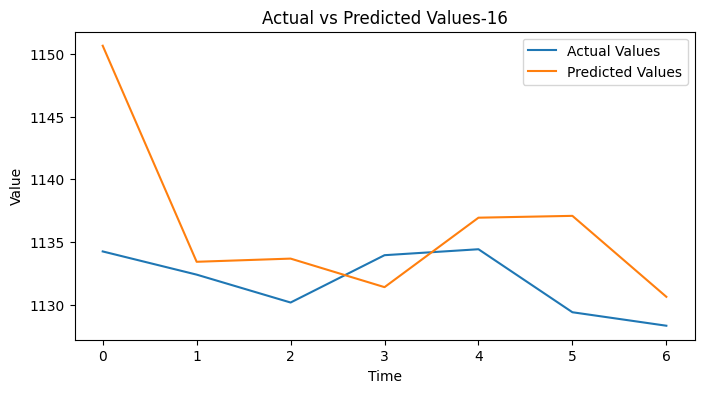

In [83]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 16')
plt.title('Actual vs Predicted Values-16')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**17**


In [84]:
train=dataset.iloc[:-238]
#test set= 5 records
test=dataset.iloc[-238:-224]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


499
Epoch 1/100
499/499 [==============================] - 4s 4ms/step - loss: 0.0178
Epoch 2/100
499/499 [==============================] - 2s 4ms/step - loss: 9.1018e-05
Epoch 3/100
499/499 [==============================] - 3s 7ms/step - loss: 9.3415e-05
Epoch 4/100
499/499 [==============================] - 3s 6ms/step - loss: 9.4137e-05
Epoch 5/100
499/499 [==============================] - 2s 5ms/step - loss: 9.0289e-05
Epoch 6/100
499/499 [==============================] - 2s 4ms/step - loss: 9.0511e-05
Epoch 7/100
499/499 [==============================] - 2s 4ms/step - loss: 1.3361e-04
Epoch 8/100
499/499 [==============================] - 3s 7ms/step - loss: 8.9129e-05
Epoch 9/100
499/499 [==============================] - 2s 4ms/step - loss: 1.4694e-04
Epoch 10/100
499/499 [==============================] - 2s 4ms/step - loss: 1.0589e-04
Epoch 11/100
499/499 [==============================] - 2s 5ms/step - loss: 1.0150e-04
Epoch 12/100
499/499 [==============================

In [85]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 176ms/step
--------------------
predictions [[1160.8055]
 [1158.419 ]
 [1144.2249]
 [1146.684 ]
 [1141.2955]
 [1144.5829]
 [1145.4523]]
Actual values [[1156.4  ]
 [1145.025]
 [1144.65 ]
 [1140.45 ]
 [1142.1  ]
 [1143.125]
 [1149.45 ]]
--------------------


In [86]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
...,...,...,...
114,NaN,1144.650,1144.224854
115,NaN,1140.450,1146.683960
116,NaN,1142.100,1141.295532
117,NaN,1143.125,1144.582886


instace 17


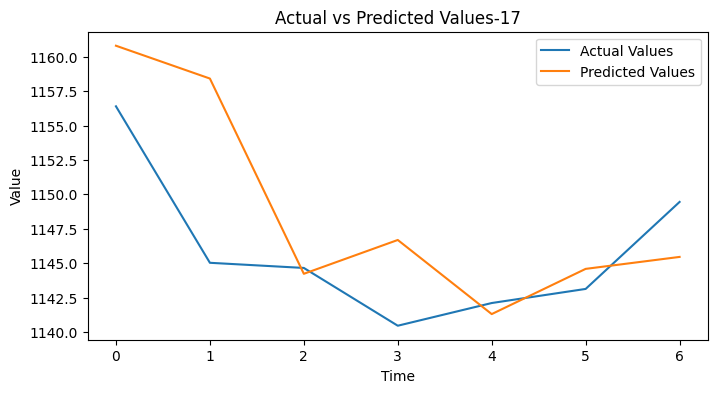

In [87]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 17')
plt.title('Actual vs Predicted Values-17')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**18**

In [88]:
train=dataset.iloc[:-252]
#test set= 5 records
test=dataset.iloc[-252:-238]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


499
Epoch 1/100
499/499 [==============================] - 4s 5ms/step - loss: 0.0062
Epoch 2/100
499/499 [==============================] - 2s 5ms/step - loss: 7.7087e-05
Epoch 3/100
499/499 [==============================] - 3s 5ms/step - loss: 8.1200e-05
Epoch 4/100
499/499 [==============================] - 2s 4ms/step - loss: 7.4794e-05
Epoch 5/100
499/499 [==============================] - 3s 5ms/step - loss: 1.2990e-04
Epoch 6/100
499/499 [==============================] - 4s 7ms/step - loss: 8.2832e-05
Epoch 7/100
499/499 [==============================] - 2s 4ms/step - loss: 8.2981e-05
Epoch 8/100
499/499 [==============================] - 2s 5ms/step - loss: 8.2880e-05
Epoch 9/100
499/499 [==============================] - 3s 5ms/step - loss: 8.0487e-05
Epoch 10/100
499/499 [==============================] - 3s 5ms/step - loss: 1.2918e-04
Epoch 11/100
499/499 [==============================] - 3s 7ms/step - loss: 1.3951e-04
Epoch 12/100
499/499 [==============================

In [89]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 178ms/step
--------------------
predictions [[1163.1404]
 [1163.603 ]
 [1169.8545]
 [1165.5042]
 [1168.8091]
 [1183.6714]
 [1161.3419]]
Actual values [[1164.15 ]
 [1169.125]
 [1167.   ]
 [1168.825]
 [1180.8  ]
 [1166.4  ]
 [1165.   ]]
--------------------


In [90]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
...,...,...,...
121,NaN,1167.000,1169.854492
122,NaN,1168.825,1165.504150
123,NaN,1180.800,1168.809082
124,NaN,1166.400,1183.671387


instace 16


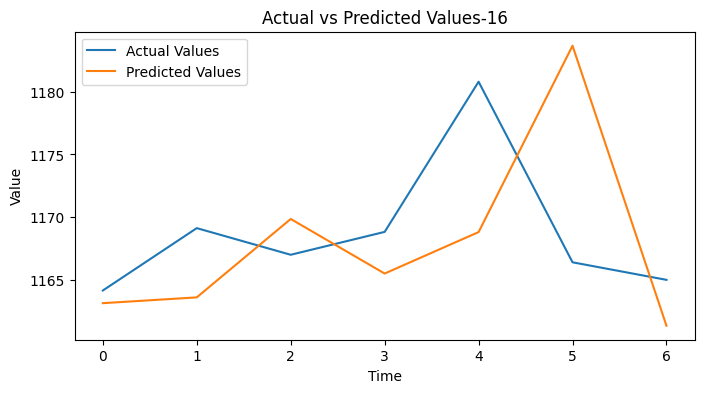

In [91]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 16')
plt.title('Actual vs Predicted Values-16')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**19**

In [92]:
train=dataset.iloc[:-266]
#test set= 5 records
test=dataset.iloc[-266:-252]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


498
Epoch 1/100
498/498 [==============================] - 4s 5ms/step - loss: 0.0131
Epoch 2/100
498/498 [==============================] - 2s 5ms/step - loss: 8.3622e-05
Epoch 3/100
498/498 [==============================] - 2s 4ms/step - loss: 8.9004e-05
Epoch 4/100
498/498 [==============================] - 2s 4ms/step - loss: 1.0311e-04
Epoch 5/100
498/498 [==============================] - 2s 4ms/step - loss: 9.2806e-05
Epoch 6/100
498/498 [==============================] - 3s 7ms/step - loss: 1.4116e-04
Epoch 7/100
498/498 [==============================] - 2s 4ms/step - loss: 9.6543e-05
Epoch 8/100
498/498 [==============================] - 2s 4ms/step - loss: 1.3030e-04
Epoch 9/100
498/498 [==============================] - 2s 4ms/step - loss: 2.1183e-04
Epoch 10/100
498/498 [==============================] - 2s 4ms/step - loss: 1.1331e-04
Epoch 11/100
498/498 [==============================] - 3s 7ms/step - loss: 1.0023e-04
Epoch 12/100
498/498 [==============================

In [93]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 233ms/step
--------------------
predictions [[1139.6499]
 [1131.5221]
 [1135.5997]
 [1137.4232]
 [1139.9744]
 [1133.9731]
 [1133.0499]]
Actual values [[1131.55 ]
 [1133.3  ]
 [1135.325]
 [1137.7  ]
 [1133.75 ]
 [1131.925]
 [1136.65 ]]
--------------------


In [94]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
...,...,...,...
128,NaN,1135.325,1135.599731
129,NaN,1137.700,1137.423218
130,NaN,1133.750,1139.974365
131,NaN,1131.925,1133.973145


instace 16


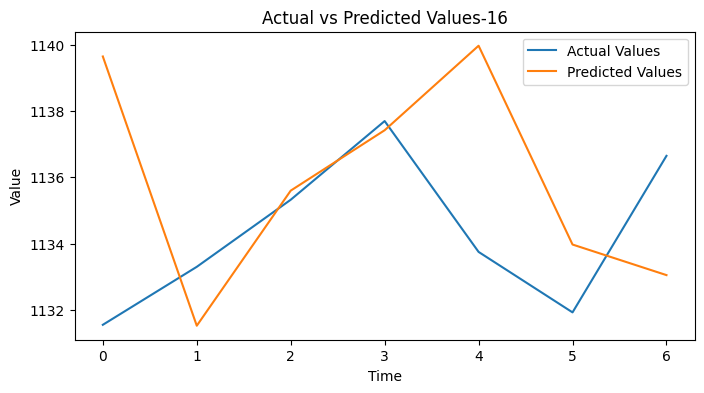

In [95]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 16')
plt.title('Actual vs Predicted Values-16')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**20**

In [96]:
train=dataset.iloc[:-280]
#test set= 5 records
test=dataset.iloc[-280:-266]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)
from  keras.preprocessing.sequence import TimeseriesGenerator
n_input=5
n_features=1
train_generator =TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=32)
print(len(train_generator ))
model = Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_generator,epochs=100,verbose=1,batch_size=1)


498
Epoch 1/100
498/498 [==============================] - 5s 6ms/step - loss: 0.0068
Epoch 2/100
498/498 [==============================] - 2s 5ms/step - loss: 7.3601e-05
Epoch 3/100
498/498 [==============================] - 2s 5ms/step - loss: 6.9990e-05
Epoch 4/100
498/498 [==============================] - 3s 6ms/step - loss: 9.4897e-05
Epoch 5/100
498/498 [==============================] - 2s 5ms/step - loss: 8.0262e-05
Epoch 6/100
498/498 [==============================] - 2s 5ms/step - loss: 8.8103e-05
Epoch 7/100
498/498 [==============================] - 2s 4ms/step - loss: 8.6536e-05
Epoch 8/100
498/498 [==============================] - 2s 4ms/step - loss: 1.0477e-04
Epoch 9/100
498/498 [==============================] - 4s 8ms/step - loss: 8.7015e-05
Epoch 10/100
498/498 [==============================] - 3s 5ms/step - loss: 9.0055e-05
Epoch 11/100
498/498 [==============================] - 2s 4ms/step - loss: 9.0169e-05
Epoch 12/100
498/498 [==============================

In [97]:
test_generator =TimeseriesGenerator(scaled_test,scaled_test,length=n_input,batch_size=1)
xlist,ylist=np.empty((0,n_input)),np.empty((0,1))
for i in range(7):
  X,y=test_generator [i]
  xlist = np.vstack([xlist, X.reshape(1, -1)])
  ylist = np.vstack([ylist, y.reshape(1, -1)])

xlist = np.array(xlist)
ylist = np.array(ylist).reshape(-1, 1)

ypred=model.predict(xlist)
true_predictions=scaler.inverse_transform(ypred)
ylist=scaler.inverse_transform(ylist)
print('-'*20)
print('predictions',true_predictions)
print('Actual values',ylist)
print('-'*20)


1/1 [==============================] - 0s 202ms/step
--------------------
predictions [[1058.3538]
 [1060.6229]
 [1058.3596]
 [1059.4683]
 [1060.543 ]
 [1058.6913]
 [1058.8518]]
Actual values [[1065.55 ]
 [1064.275]
 [1064.7  ]
 [1065.675]
 [1064.4  ]
 [1064.175]
 [1109.75 ]]
--------------------


In [98]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1236.575,1225.391602
1,,1227.525,1240.371338
2,,1232.450,1224.384277
3,,1229.125,1233.487427
4,,1233.275,1227.253296
...,...,...,...
135,NaN,1064.700,1058.359619
136,NaN,1065.675,1059.468262
137,NaN,1064.400,1060.542969
138,NaN,1064.175,1058.691284


instace 16


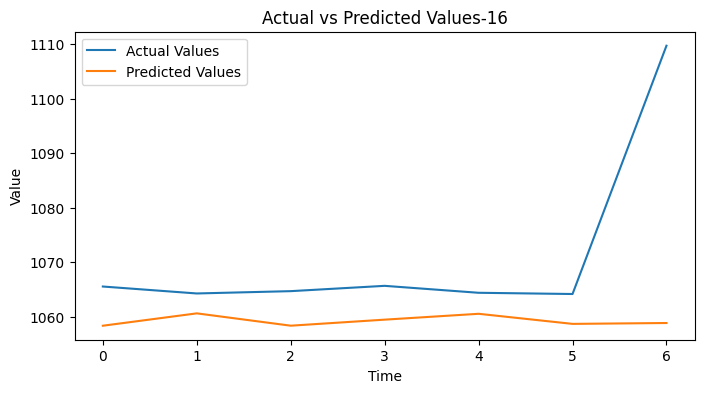

In [99]:
plt.figure(figsize=(8, 4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
print('instace 16')
plt.title('Actual vs Predicted Values-16')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [100]:
df['Iteration'] = df['Iteration'].fillna(0)
file_name = 'LSTM_hour.xlsx'
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
